<a href="https://colab.research.google.com/github/mahwood/road_requests_exercise/blob/main/mahwood2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # France in America Collection

 It explored the history of the French presence in North America from the first decades of the 16th century to the end of the 19th century. The collection cotains 650 items all available online.

In [2]:
import requests #import the library that we use to make the http request
# To get the JSON data add '?fo=json' to the end of the URL.
# To get only the France in America collect
r = requests.get("https://www.loc.gov/collections/france-in-america/?fo=json&at")
r.json() #print out the results:

{'breadcrumbs': [{'Library of Congress': 'https://www.loc.gov'},
  {'Digital Collections': 'https://www.loc.gov/collections/'},
  {'France in America': 'https://www.loc.gov/collections/france-in-america/'}],
 'categories': ['about-this-collection'],
 'content': {'active': True,
  'link': 'https://www.loc.gov/collections/france-in-america/',
  'markup': None,
  'pagination': '2 of 2',
  'partof': [],
  'results': [{'access_restricted': False,
    'aka': ['http://www.loc.gov/item/2006700053/',
     'http://lccn.loc.gov/2006700053',
     'https://hdl.loc.gov/loc.gdc/gdclccn.2006700053',
     'http://www.loc.gov/resource/gdclccn.2006700053/'],
    'campaigns': [],
    'contributor': ['kératry, e. de (emile)'],
    'date': '1867-01-01',
    'dates': ['1867'],
    'description': ['Also available in digital form on the Library of Congress Web site.'],
    'digitized': True,
    'extract_timestamp': '2021-05-10T20:34:55.562Z',
    'group': ['ascfr/frlcgc/tx',
     'catalog-split-07',
     'cat

To get the Tiles in the America collections.

input code below:

In [4]:
collections_json = requests.get("https://www.loc.gov/collections/france-in-america/?fo=json&at").json()

while True: #As long as we have a next page, go and fetch it
    for collection in collections_json["results"]:
        print(collection["title"]) #print out the collection's title
    next_page = collections_json["pagination"]["next"] #get the next page url
    if next_page is not None: #make sure we haven't hit the end of the pages
        collections_json = requests.get(next_page).json()
    else:
        break #we are done and can stop looping

L'élévation et la chute de l'empereur Maximilien; intervention française au Mexique, 1861-1867.
John Slidell to Benjamin, July 6, 1863 - December 13, 1864
Memoranda respecting the French slave trade in 1820 : drawn up at the close of that year.
Upon whom rests the guilt of the war? Separation: war without end.
A letter from Percival Stockdale to Granville Sharp, Esq., suggested to the authour by the present insurrection of the Negroes in the island of St. Domingo.
[John James Audubon, half-length portrait, facing right]
[John James Audubon, 1785-1851, head-and-shoulders portrait, facing right in oval memorial portrait fringed by bird vignettes]
Vingt annees de missions dans le nord-ouest de l'Amerique
The life of Father Isaac Jogues, missionary priest of the Society of Jesus, slain by the Mohawk Iroquois, in the present State of New York, Oct. 18, 1646.
Notice sur l'état actuel de la mission de la Louisiane.
American Telegraph Company: Diplomatic Missions
Newspaper clippings, 1860-1864

### Titles in the collection France in America and their Displayed Image

In [7]:
from IPython.display import Image, display #tell python that we want to reuse some code to display the images for us

item_image = requests.get("https://www.loc.gov/collections/france-in-america/?fo=json").json() #get the JSON data
for item in item_image["results"]:
    print(item["title"]) #print out the title
    display(Image(url=item["image_url"][0])) #display the Item image

L'élévation et la chute de l'empereur Maximilien; intervention française au Mexique, 1861-1867.


John Slidell to Benjamin, July 6, 1863 - December 13, 1864


Memoranda respecting the French slave trade in 1820 : drawn up at the close of that year.


Upon whom rests the guilt of the war? Separation: war without end.


A letter from Percival Stockdale to Granville Sharp, Esq., suggested to the authour by the present insurrection of the Negroes in the island of St. Domingo.


[John James Audubon, half-length portrait, facing right]


[John James Audubon, 1785-1851, head-and-shoulders portrait, facing right in oval memorial portrait fringed by bird vignettes]


Vingt annees de missions dans le nord-ouest de l'Amerique


The life of Father Isaac Jogues, missionary priest of the Society of Jesus, slain by the Mohawk Iroquois, in the present State of New York, Oct. 18, 1646.


Notice sur l'état actuel de la mission de la Louisiane.


American Telegraph Company: Diplomatic Missions


Newspaper clippings, 1860-1864, France (Folder one)


Newspaper clippings, 1860-1864, France (Folder two)


Translation of newspaper clippings, 1860-1864, France (Folder three)


John Slidell to Benjamin, February 11, 1865 - June 21, 1863


Reminiscences, musical and other,


A philosophical and political history of the settlements and trade of the Europeans in the East and West Indies.


The book of the homeless (Le livre des sans-foyer)


The American fugitive in Europe. Sketches of places and people abroad.


Mont-Saint-Michel and Chartres


A little tour in France.


A motor-flight through France,


Franco-German War and insurrection of the commune.


Recollections of a minister to France, 1869-1877,


French ways and their meaning,


### Graph showing the number of time a loaction showed up for the collection

<Axes: >

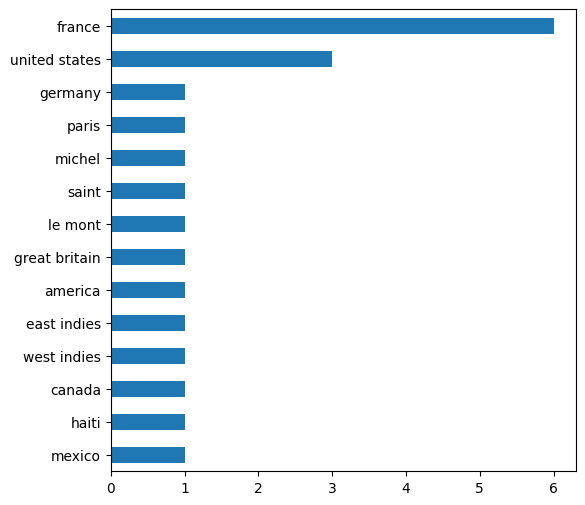

In [28]:
import pandas as pd
%matplotlib inline
from collections import Counter
location_counter = Counter()
FiA = requests.get("https://www.loc.gov/collections/france-in-america/?fo=json").json()
for item in FiA["results"]:
    if "location" in item and item['location'] is not None: #check that the item has a location
        for location in item['location']:
            location_counter[location] += 1 #add one for the location

locations = pd.Series(location_counter)
locations.sort_values(ascending=True).plot(kind='barh', figsize=(6,6))